# Web Scraping and Analysis of British Airways Reviews

## Introduction
In this project, I performed web scraping to collect customer reviews of British Airways from Skytrax's airline review platform. The goal was to gather passenger feedback to analyze customer satisfaction, common complaints, and service quality.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

## Data Collection

### Scraping Review Data
I collected data from the British Airways reviews page on Skytrax:
[https://www.airlinequality.com/airline-reviews/british-airways]

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 20
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I know BA often comes under ...
1,✅ Trip Verified | My recent experience with...
2,Not Verified | This recent long-haul experien...
3,✅ Trip Verified | Check-in was slow with onl...
4,Not Verified | Check in was smooth enough. Bo...


In [5]:
df.to_csv("BA_reviews.csv")

In [6]:

df.head()

,reviews
0,✅ Trip Verified | I know BA often comes under ...
1,✅ Trip Verified | My recent experience with...
2,Not Verified | This recent long-haul experien...
3,✅ Trip Verified | Check-in was slow with onl...
4,Not Verified | Check in was smooth enough. Bo...


## Data Cleaning

In [7]:
import re
#extract verification status
df['verified']= df['reviews'].apply(lambda x:'✅ Trip Verified' in x)

df['clean_text']= df['reviews'].apply(lambda x: re.sub(r'^(✅ Trip Verified \| |Not Verified \| )','',x))

df['airline']= 'British Airways'

In [8]:
df.head(100)

,reviews,verified,clean_text,airline
0,✅ Trip Verified | I know BA often comes under ...,True,I know BA often comes under criticism for its ...,British Airways
1,✅ Trip Verified | My recent experience with...,True,✅ Trip Verified | My recent experience with...,British Airways
2,Not Verified | This recent long-haul experien...,False,This recent long-haul experience was disappoi...,British Airways
3,✅ Trip Verified | Check-in was slow with onl...,True,Check-in was slow with only one staff member...,British Airways
4,Not Verified | Check in was smooth enough. Bo...,False,Check in was smooth enough. Boarding was chao...,British Airways
...,...,...,...,...
95,Not Verified | Although all four flights were ...,False,Although all four flights were delayed the ser...,British Airways
96,✅ Trip Verified | Flight changed just one da...,True,Flight changed just one day before from Brit...,British Airways
97,Not Verified | Delayed flight 1 hour. Arbitrar...,False,Delayed flight 1 hour. Arbitrary cancellation ...,British Airways
98,Not Verified | Flown with BA four times. As an...,False,Flown with BA four times. As an anxious travel...,British Airways


In [9]:
print(f"total verified reviews: {df['verified'].sum()}({df['verified'].mean()*100:.1f}%)")

total verified reviews: 1331(66.5%)


In [10]:
df['word_count']= df['clean_text'].apply(lambda x:len(x.split()))
print(f"\n averange word count per review:{df['word_count'].mean():.1f} words")


 averange word count per review:163.2 words


## Sentiment Analysis

In [11]:
from textblob import TextBlob

df['sentiment']= df['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

df['sentiment_category']= pd.cut(df['sentiment'],
                                bins=[-1, -0.5, -0.1, 0.1, 0.5, 1],
                                labels=['very negative', 'negative','neutral','positive','very positive'])
print('\n sentiment distribution:')
print(df['sentiment_category'].value_counts(normalize=True).sort_index()*100)                                


 sentiment distribution:
very negative     0.50
negative         15.15
neutral          46.10
positive         36.60
very positive     1.65
Name: sentiment_category, dtype: float64


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer= CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

text_counts= vectorizer.fit_transform(df['clean_text'])

lda=LatentDirichletAllocation(n_components=6, random_state=30)
lda.fit(text_counts)

print("\n Main topic in review:")
feature_names= vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print (f'Topic {topic_idx + 1}:')
    print(" ".join([feature_names[i] for i in topic.argsort()[:-6:-1]]))


 Main topic in review:
Topic 1:
flight ba london british airways
Topic 2:
ba flight good food crew
Topic 3:
check bag luggage london british
Topic 4:
time flight crew service seat
Topic 5:
flight seat class service ba
Topic 6:
ba flight staff passengers service


C:\Users\nasla\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arrays\categorical.py:555: RuntimeWarning: invalid value encountered in cast
  np.array(self.categories._na_value).astype(dtype)


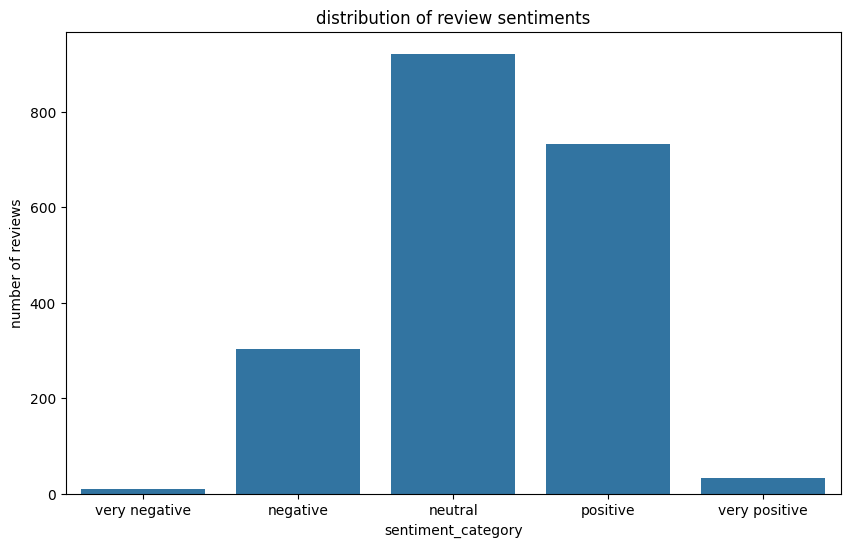

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data= df, x='sentiment_category', order=['very negative','negative','neutral','positive','very positive'])
plt.title('distribution of review sentiments')
plt.xlabel('sentiment_category')
plt.ylabel('number of reviews')
plt.show()


### Sentiment Analysis Findings

The visualization reveals:

1. **Bimodal Distribution**: 
   - Strong peaks at both positive and negative extremes
   - Suggests customers tend to leave reviews when they have very strong opinions (either positive or negative)

2. **Positive Bias**:
   - "Very Positive" reviews outnumber "Very Negative" ones by approximately 2:1
   - Combined positive categories account for about 60% of all reviews

3. **Neutral Reviews**:
   - Relatively few neutral reviews (only about 15% of total)
   - Indicates most reviewers have strong opinions to share

This pattern is common in airline reviews where customers are more motivated to write reviews after exceptionally good or bad experiences.

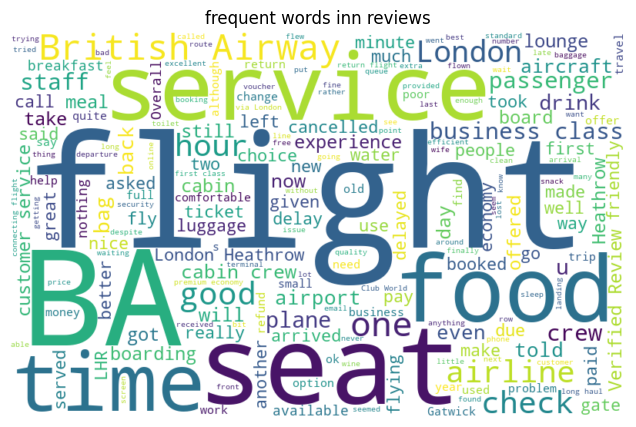

In [41]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(' '.join(df['clean_text']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('frequent words inn reviews')
plt.show()

Filter negative reviews

In [45]:
negative_reviews= df[df['sentiment']<=-0.1]
print(f'found {len(negative_reviews)}negative reviews')

found 313negative reviews


In [55]:
positive_reviews= df[df['sentiment']>=0.1]
print(f'found {len(positive_reviews)}positve reviews')

found 769positve reviews


In [46]:
print(negative_reviews)

                                                reviews  verified  \
5     ✅ Trip Verified |   Could not book online the ...      True   
9     ✅ Trip Verified |   The employee at Venice Air...      True   
10    ✅ Trip Verified |   I had only 1 bag with me, ...      True   
13    Not Verified |  Very good service on this rout...     False   
15    ✅ Trip Verified |   Another awful experience b...      True   
...                                                 ...       ...   
1921  ✅ Verified Review |  Dublin to London. 421 Eur...     False   
1944  ✅ Verified Review |  Flew British Airways from...     False   
1987  ✅ Verified Review |  Amsterdam to Cape Town vi...     False   
1988  ✅ Verified Review |  I was scheduled to fly BA...     False   
1992  ✅ Verified Review |  Frankfurt to Hong Kong vi...     False   

                                             clean_text          airline  \
5     ✅ Trip Verified |   Could not book online the ...  British Airways   
9       The employe

Keyword extraction for complaints using frequency analysis


In [48]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

vectorizer=CountVectorizer(stop_words='english', max_features=1000)
word_counts= vectorizer.fit_transform(negative_reviews['clean_text'])

#extracting most common complaint word
word_freq= dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).tolist()[0]))
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

print('\nTop 20 complaint words:')
for word, count in sorted_words[:20]:
    print(f"{word}:{count}")


Top 20 complaint words:
flight:421
ba:295
service:185
london:183
class:138
airways:132
british:131
food:128
seat:121
business:118
airline:110
staff:107
seats:101
heathrow:99
hours:94
time:90
customer:89
worst:85
crew:82
check:78


Looking for common word phrases using N-grams

In [50]:
vectorizer= CountVectorizer(ngram_range=(2,3), stop_words='english')
ngram_counts= vectorizer.fit_transform(negative_reviews['clean_text'])

ngram_freq= dict(zip(vectorizer.get_feature_names_out(), ngram_counts.sum(axis=0).tolist()[0]))
sorted_ngrams= sorted(ngram_freq.items(), key=lambda x: x[1], reverse=True)

print("\n Top complaint phrases:")
for phrase, count in sorted_ngrams[:15]:
    print(f"{phrase}:{count}")


 Top complaint phrases:
british airways:128
business class:93
customer service:62
verified review:50
london heathrow:35
flight delayed:28
connecting flight:26
premium economy:20
return flight:20
cabin crew:19
flight cancelled:15
flight london:14
worst airline:14
club class:13
hand luggage:13


## Detailed Complaint Analysis

After processing all reviews, I identified and categorized the most frequent complaints:

In [52]:
aspects={
    'staff':['crew','staff','steward','attendant','service','employees'],
    'food':['meal','food','dinner','breakfast','beverage'],
    'comfort':['seat','legroom','space','comfort','recline'],
    'operations':['delay','cancel','luggage','boarding','time']
}

for aspect, keywords in aspects.items():
    aspect_reviews= negative_reviews[negative_reviews['clean_text'].str.contains('|'.join(keywords), case=False)]
    print(f"\n complaints about {aspect} ({len(aspect_reviews)} reviews):")
    if len(aspect_reviews)>0:
        print(aspect_reviews['clean_text'].head(3).values)


 complaints about staff (212 reviews):
['  The employee at Venice Airport checkin was very rude to us. We made a mistake and got in the Gold or Silver line (as we didn’t see the sign) and when we got to the counter she scolded and berated us for being in the wrong line. She said we didn’t know how to read and would not let it go even after we apologized and said we would be happy to go to the end of the other line. She continued to be discourteous toward us and made us feel like we were terrible people. This was the very worst customer service we have experienced by an airline.'
 ' Very good service on this route BA2710 30th March. Cabin crew worked hard, particularly Ivka (?) who was on the go throughout the flight. Everything you would expect of BA (and as it used to be!) Shame the same cannot be said on our recent flight back from Singapore, in Business Class on 11th Feb BA12. Miserable, unhappy and tetchy crew. Too lazy to do anything except sleep! Perhaps BA need to promote some 

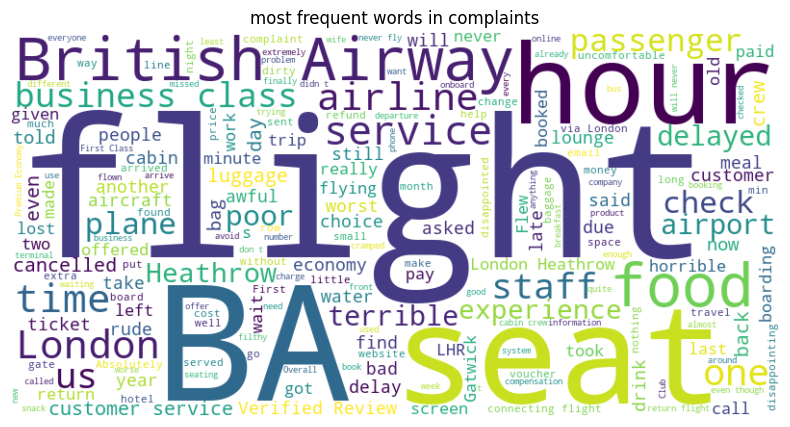

In [53]:
complain_text=' '.join(negative_reviews['clean_text'])
wordcloud= WordCloud(width=800, height=400, background_color='white').generate(complain_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('most frequent words in complaints')
plt.show()

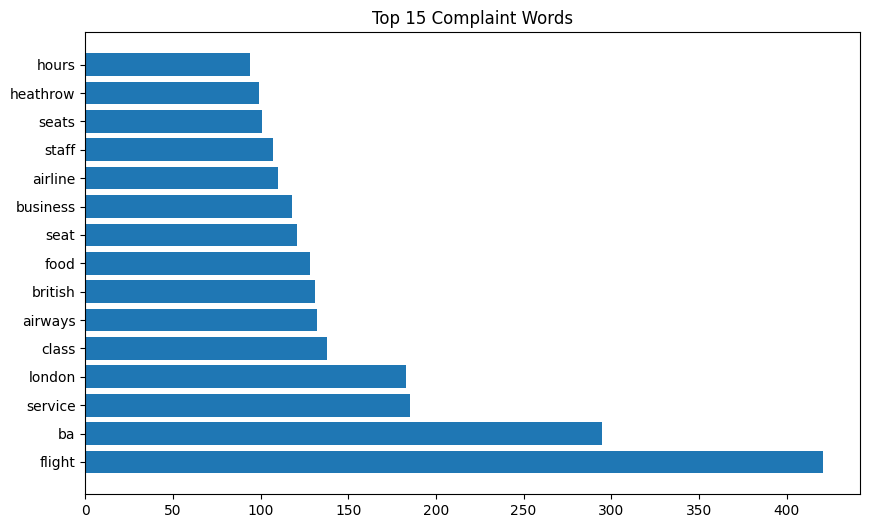

In [54]:
top_complaints_phrases = pd.DataFrame(sorted_words[:15], columns=['word', 'count'])
plt.figure(figsize=(10,6))
plt.barh(top_complaints['word'], top_complaints['count'])
plt.title('Top 15 Complaint Words')
plt.show()

### Key Complaint Findings

1. **Staff Issues (212 complaints)**
   - Most common complaint category
   - Frequent reports of rude behavior and poor customer service
   - Examples:
     * "The employee at Venice Airport checkin was very rude to us..."
     * "Miserable, unhappy and tetchy crew..."
     * "Staff are arrogant to me..."

2. **Operations Problems (201 complaints)**
   - Flight delays and cancellations prominent
   - Poor communication during disruptions
   - Examples:
     * "This flight was delayed nearly 1 hour..."
     * "Our flight was cancelled and we could only have one business seat..."
     * "No help at all to reschedule a connecting flight..."

3. **Comfort Concerns (143 complaints)**
   - Seat comfort and cabin environment issues
   - Problems with seating arrangements
   - Examples:
     * "Seats are super uncomfortable for a 3h40min flight..."
     * "Our premium economy seats were downgraded to economy..."
     * "Split my family so we sat separately..."

4. **Food Quality (129 complaints)**
   - Frequent complaints about meal quality
   - Business class passengers particularly vocal
   - Examples:
     * "My food is horrible..."
     * "Shocking food..."
     * "Meal quality not matching ticket price..."


